# KNN with PCA

In [1]:
import numpy as np
import pandas as pd

In [2]:
features_3s = pd.read_csv("D:\My Files\Documents\College Docs\Major Project\Data/features_3_sec.csv")
features_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features_3s['label'] = labelencoder.fit_transform(features_3s['label']);

In [6]:
# features_3s.shape

In [7]:
# features_3s['label'].value_counts()

In [8]:
# features_3s.columns.value_counts()

In [4]:
X = features_3s.iloc[:,2:-1].values
# X
y = features_3s.iloc[:, 59].values
# y

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
# X_train
X_test = sc.transform(X_test)
# X_test

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

In [25]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([8, 8, 9, ..., 3, 9, 2])

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[237,   2,  16,   7,   1,   9,   2,   0,   9,   4],
       [  2, 273,   2,   0,   0,  16,   0,   0,   1,   1],
       [ 26,   7, 221,  18,   1,  12,   0,   3,  14,  11],
       [ 14,   3,  20, 219,   4,   1,   3,  13,   4,   9],
       [  6,   0,  13,  11, 243,   0,   1,  12,  11,   4],
       [ 11,  21,  25,   8,   4, 217,   0,   3,   1,   5],
       [  4,   0,   2,  16,   5,   2, 270,   0,   3,  10],
       [  1,   2,   6,  20,  16,   5,   0, 221,  12,   4],
       [ 15,   2,  18,   8,  16,   3,   1,   9, 241,   5],
       [ 21,   7,  28,  25,   8,  11,  10,   3,   8, 178]], dtype=int64)

Text(159.0, 0.5, 'Truth/Actual Label')

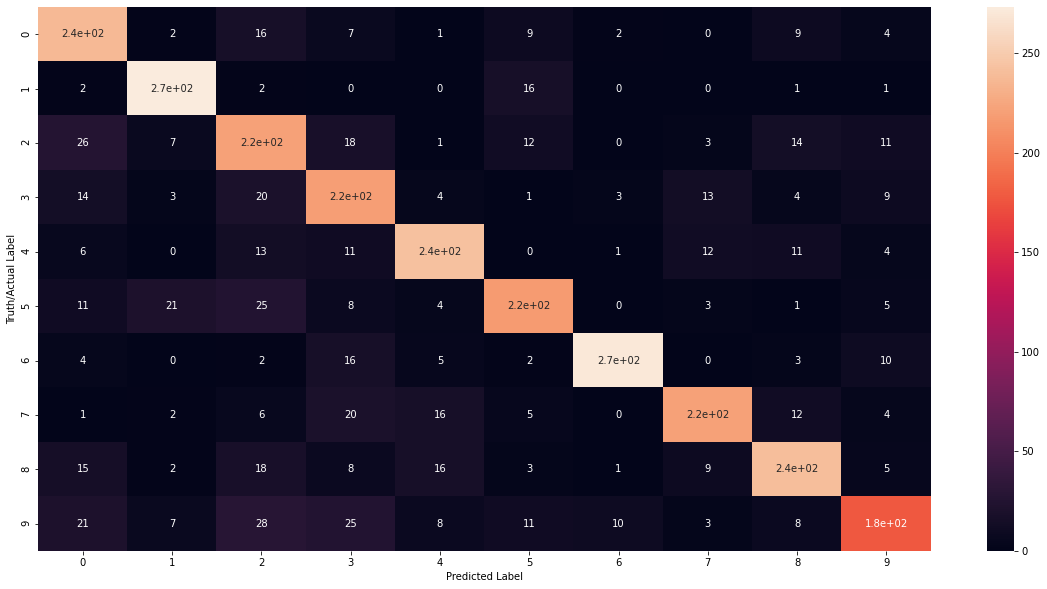

In [28]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (20,10))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Truth/Actual Label")

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       287
           1       0.86      0.93      0.89       295
           2       0.63      0.71      0.67       313
           3       0.66      0.76      0.70       290
           4       0.82      0.81      0.81       301
           5       0.79      0.74      0.76       295
           6       0.94      0.87      0.90       312
           7       0.84      0.77      0.80       287
           8       0.79      0.76      0.77       318
           9       0.77      0.60      0.67       299

    accuracy                           0.77      2997
   macro avg       0.78      0.77      0.77      2997
weighted avg       0.78      0.77      0.77      2997



In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7741074407741074

In [31]:
print ('Accuracy for KNN Classifier :', accuracy_score(y_test,  y_pred))

Accuracy for KNN Classifier : 0.7741074407741074
